In [1]:
# import
from cifardef import *
from PIL import Image  
import torch,math,os
from torch import nn, optim
import torch.nn.functional as F
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision import datasets
from matplotlib import pyplot as plt
import numpy as np

In [23]:
# network definition
class lenet5(nn.Module):
    def __init__(self,in_dim,n_class):
        super(lenet5, self).__init__()
        self.m1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=6, kernel_size=3, stride=1
                      ),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Sigmoid()
        )  # 对应图中的C1,S1
        self.m2 = nn.Sequential(
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=3, stride=1
                      ),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Sigmoid()
        )  # 对应图中的C3,S4
        self.m3 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=120, kernel_size=3)
        )  # 对应图中的C5
        self.linear = nn.Sequential(
            nn.Linear(1920, 10)
        )  # 对应最后的全连接层

    def forward(self, x):
        m1 = self.m1(x)
        m2 = self.m2(m1)
        m3 = self.m3(m2)
        m3 = m3.view(m3.size(0), -1)
        output = self.linear(m3)
        return output


In [25]:
del model
PATH='Lenet.pkl'
model = lenet5(3,10)
if os.path.isfile(PATH):
    model.load_state_dict(torch.load(PATH))
    print(model.eval())
else:
    print('No model')

lenet5(
  (m1): Sequential(
    (0): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): Sigmoid()
  )
  (m2): Sequential(
    (0): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): Sigmoid()
  )
  (m3): Sequential(
    (0): Conv2d(16, 120, kernel_size=(3, 3), stride=(1, 1))
  )
  (linear): Sequential(
    (0): Linear(in_features=1920, out_features=10, bias=True)
  )
)


In [22]:
batch_size = 128
learning_rate = 0.001
num_epoches = 1000

transform = transforms.Compose(
    [
        transforms.ToTensor(),
#         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])
# train_dataset = cifar_10('data/cifar-10-batches-py',
#                          train=True, transform=transform,index=2)
test_dataset = cifar_10('data/cifar-10-batches-py',
                        train=False, transform=transform)
meta=unpickle('data/cifar-10-batches-py/batches.meta')
# train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

train_datasetList = [ cifar_10('data/cifar-10-batches-py',
                         train=True, transform=transform,index=i+1) for i in range(5)]
train_loaderList=[DataLoader(t, batch_size=batch_size, shuffle=True) for t in train_datasetList]

# 定义loss和optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
loss_function = nn.CrossEntropyLoss() # 交叉熵损失函数常用于分类


In [11]:
cuda_gpu = torch.cuda.is_available()
if cuda_gpu:
    model = model.cuda()
epochs=10000

for epoch in range(1, epochs + 1):
    print('Train Epoch: {}/{}:'.format(epoch,epochs))
    for t in train_loaderList:
        train(model,num_epoches,criterion,optimizer,t)
    if(epoch%(epochs/100)==0):
        acc, loss = test(model, 1, criterion, test_loader)
torch.save(model.state_dict(),PATH)

Train Epoch: 1/10000:
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 2.290793
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 2.304549
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 2.318248
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 2.306963
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 2.297331
Train Epoch: 2/10000:
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 2.314374
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 2.302596
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 2.305663
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 2.281236
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 2.299222
Train Epoch: 3/10000:
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 2.299789
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 2.304517
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 2.313321
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 2.304673
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 2.299499
Train Epoch: 4/10000:
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 2.309968
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 2.3

Train Epoch: 1000 [10000/10000 (100%)]	Loss: 2.304701
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 2.313173
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 2.311430
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 2.307606
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 2.298055
Train Epoch: 30/10000:
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 2.304694
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 2.303813
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 2.302375
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 2.298343
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 2.308455
Train Epoch: 31/10000:
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 2.315969
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 2.306596
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 2.303007
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 2.319161
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 2.278971
Train Epoch: 32/10000:
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 2.298554
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 2.301113
Train Epoch: 

Train Epoch: 1000 [10000/10000 (100%)]	Loss: 2.308654
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 2.298716
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 2.310810
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 2.311092
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 2.302287
Train Epoch: 58/10000:
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 2.302656
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 2.300017
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 2.293572
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 2.296332
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 2.300925
Train Epoch: 59/10000:
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 2.318121
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 2.311571
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 2.317947
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 2.299009
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 2.297937
Train Epoch: 60/10000:
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 2.312342
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 2.292211
Train Epoch: 

Train Epoch: 1000 [10000/10000 (100%)]	Loss: 2.286770
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 2.305515
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 2.310451
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 2.291822
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 2.300352
Train Epoch: 86/10000:
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 2.292112
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 2.311799
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 2.299520
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 2.302597
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 2.306178
Train Epoch: 87/10000:
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 2.297200
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 2.315021
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 2.312790
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 2.299422
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 2.282641
Train Epoch: 88/10000:
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 2.292254
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 2.297648
Train Epoch: 

KeyboardInterrupt: 

In [12]:
torch.save(model.state_dict(), PATH)

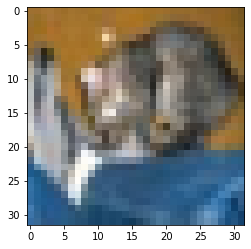

b'cat' , b'cat'


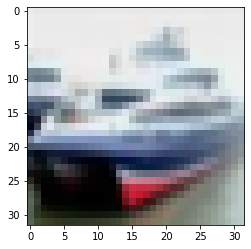

b'ship' , b'ship'


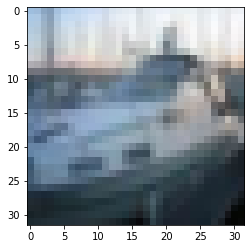

b'ship' , b'ship'


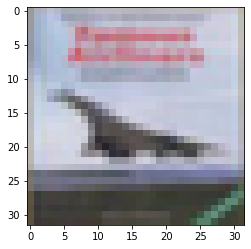

b'airplane' , b'airplane'


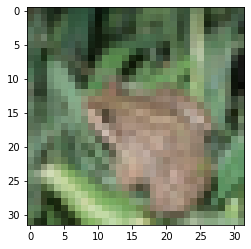

b'frog' , b'frog'


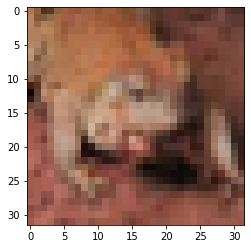

b'frog' , b'frog'


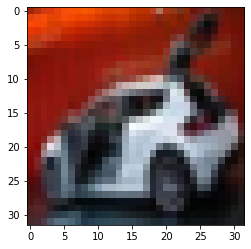

b'automobile' , b'automobile'


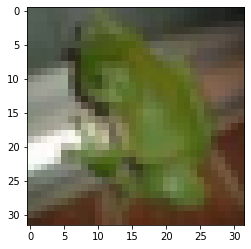

b'frog' , b'frog'


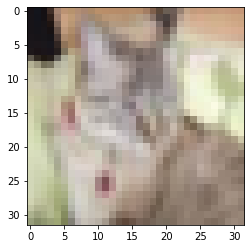

b'cat' , b'cat'


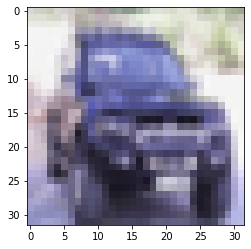

b'automobile' , b'automobile'


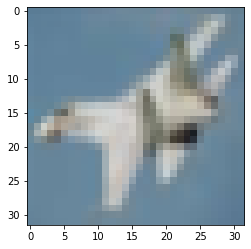

b'deer' , b'airplane'


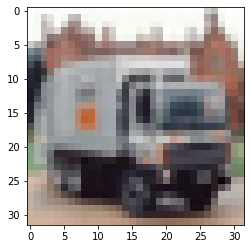

b'truck' , b'truck'


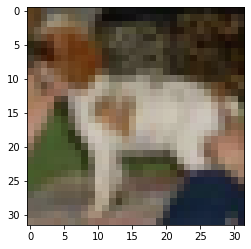

b'dog' , b'dog'


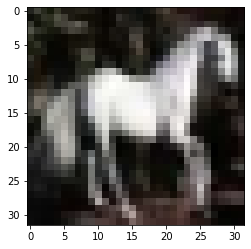

b'horse' , b'horse'


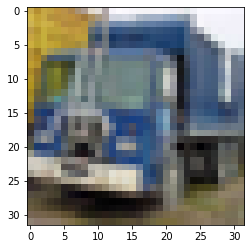

b'truck' , b'truck'


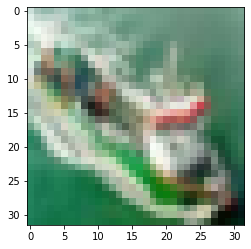

b'ship' , b'ship'


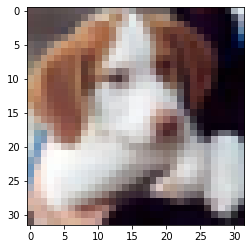

b'dog' , b'dog'


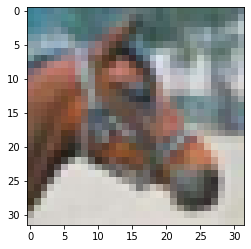

b'horse' , b'horse'


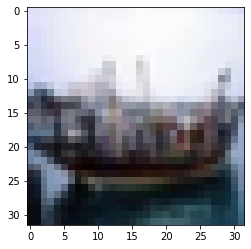

b'ship' , b'ship'


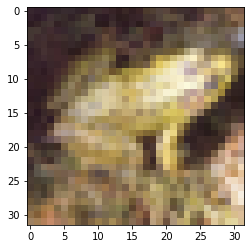

b'frog' , b'frog'


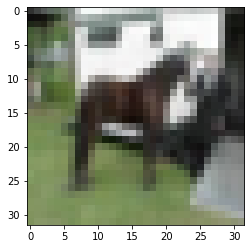

b'horse' , b'horse'


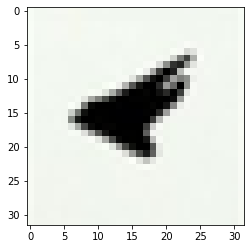

b'airplane' , b'airplane'


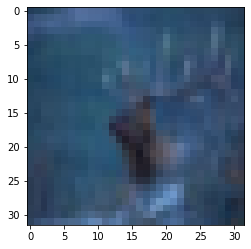

b'ship' , b'deer'


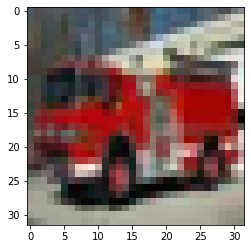

b'truck' , b'truck'


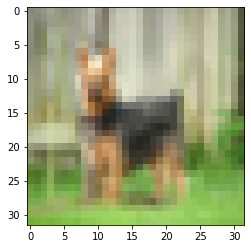

b'deer' , b'dog'


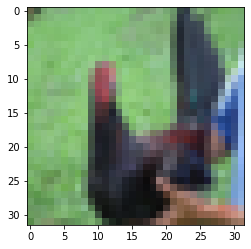

b'deer' , b'bird'


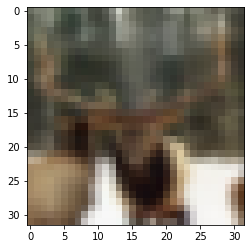

b'deer' , b'deer'


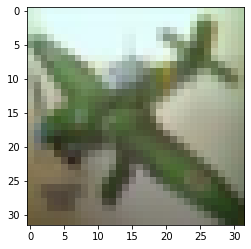

b'airplane' , b'airplane'


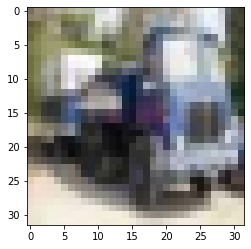

b'truck' , b'truck'


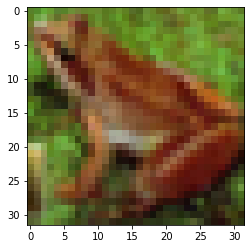

b'frog' , b'frog'


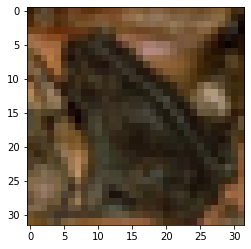

b'frog' , b'frog'


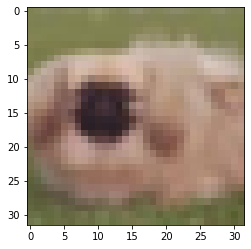

b'dog' , b'dog'


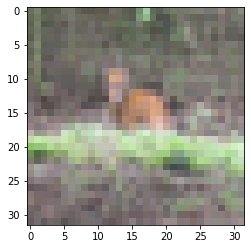

b'bird' , b'deer'


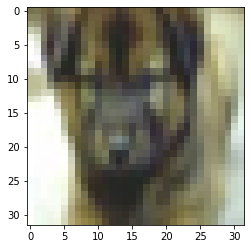

b'cat' , b'dog'


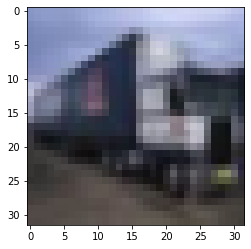

b'truck' , b'truck'


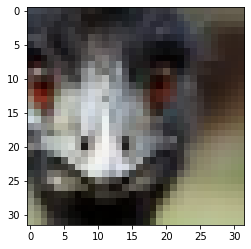

b'bird' , b'bird'


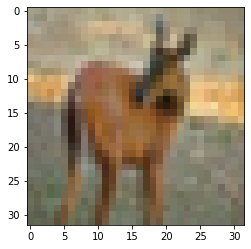

b'deer' , b'deer'


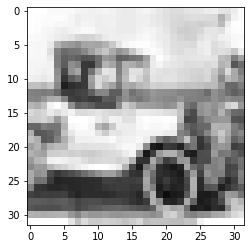

b'truck' , b'automobile'


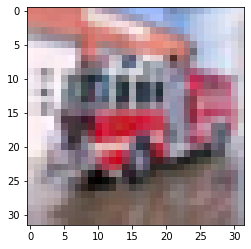

b'truck' , b'truck'


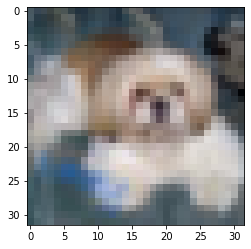

b'dog' , b'dog'


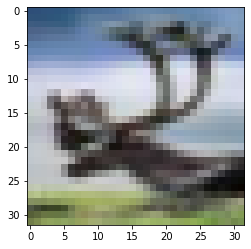

b'airplane' , b'deer'


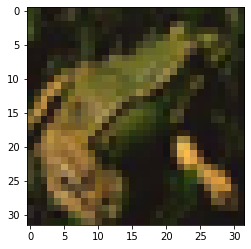

b'frog' , b'frog'


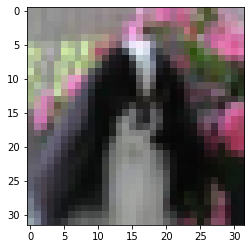

b'horse' , b'dog'


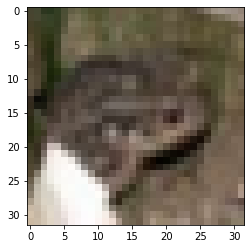

b'frog' , b'frog'


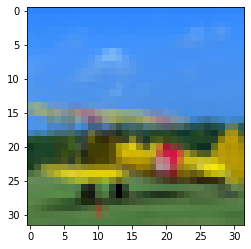

b'airplane' , b'airplane'


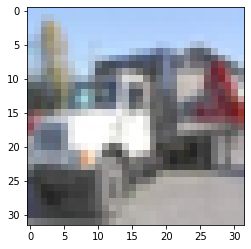

b'truck' , b'truck'


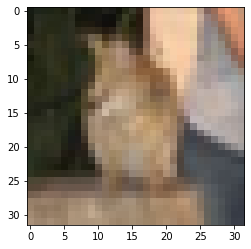

b'cat' , b'cat'


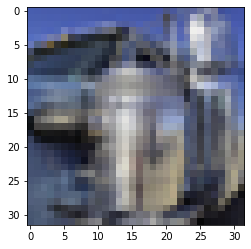

b'horse' , b'truck'


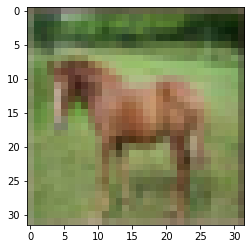

b'horse' , b'horse'


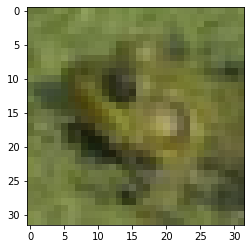

b'bird' , b'frog'


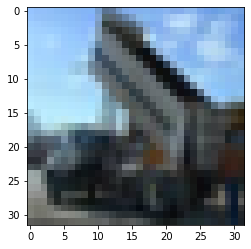

b'truck' , b'truck'


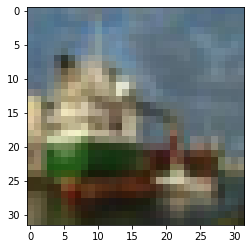

b'airplane' , b'ship'


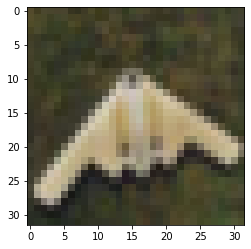

b'bird' , b'airplane'


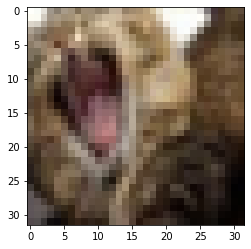

b'cat' , b'cat'


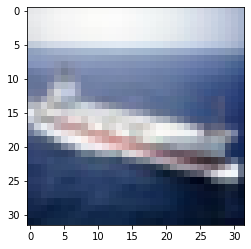

b'ship' , b'ship'


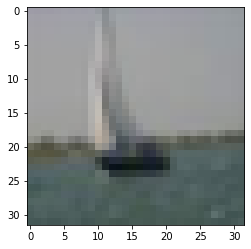

b'ship' , b'ship'


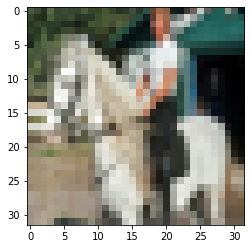

b'horse' , b'horse'


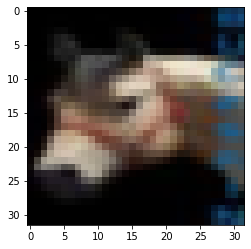

b'dog' , b'horse'


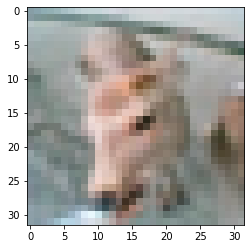

b'horse' , b'deer'


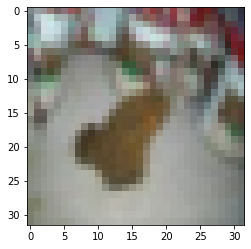

b'bird' , b'frog'


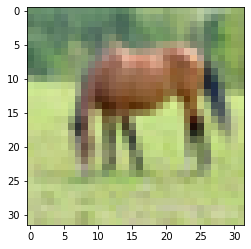

b'horse' , b'horse'


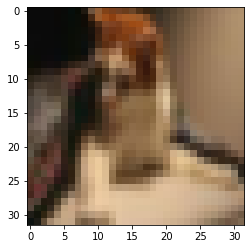

b'dog' , b'cat'


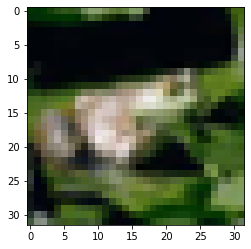

b'frog' , b'frog'


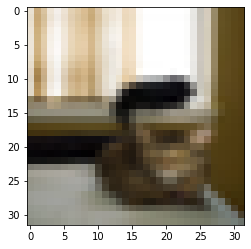

b'cat' , b'cat'


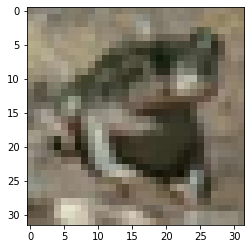

b'frog' , b'frog'


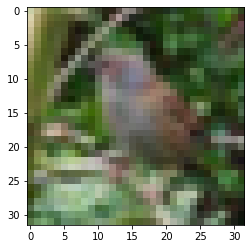

b'frog' , b'bird'


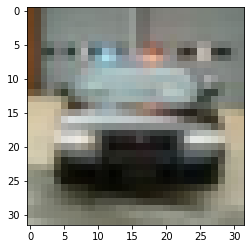

b'automobile' , b'automobile'


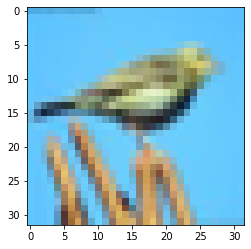

b'bird' , b'bird'


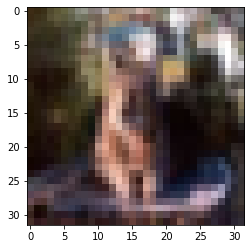

b'cat' , b'cat'


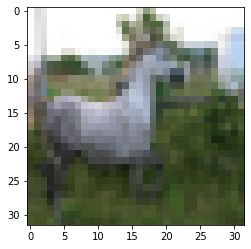

b'airplane' , b'horse'


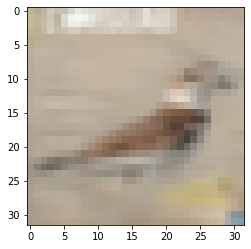

b'bird' , b'bird'


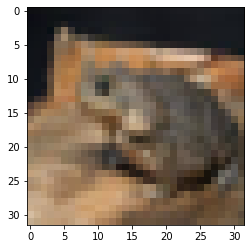

b'frog' , b'frog'


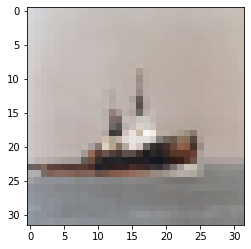

b'ship' , b'ship'


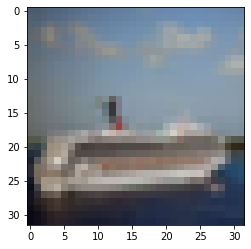

b'ship' , b'ship'


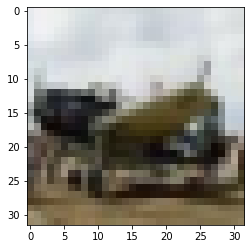

b'airplane' , b'airplane'


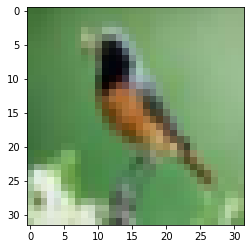

b'horse' , b'bird'


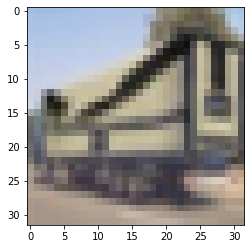

b'airplane' , b'truck'


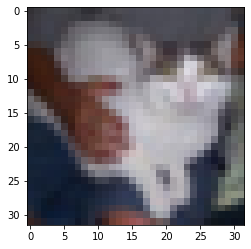

b'cat' , b'cat'


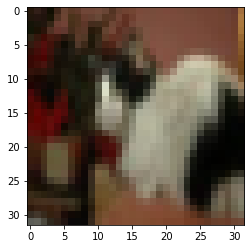

b'cat' , b'cat'


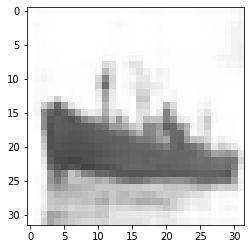

b'ship' , b'ship'


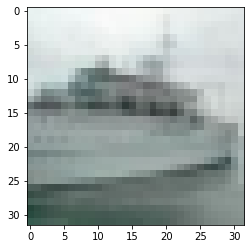

b'ship' , b'ship'


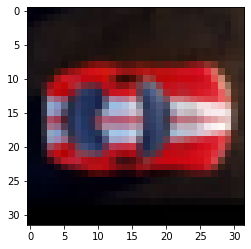

b'automobile' , b'automobile'


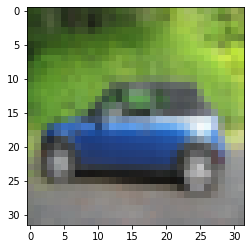

b'automobile' , b'automobile'


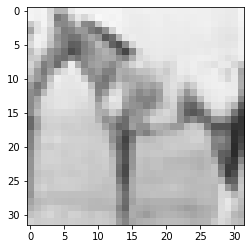

b'horse' , b'horse'


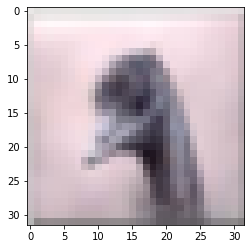

b'bird' , b'bird'


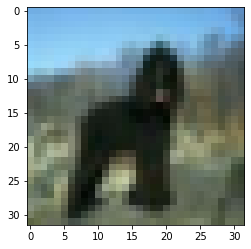

b'horse' , b'dog'


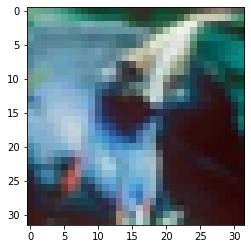

b'bird' , b'bird'


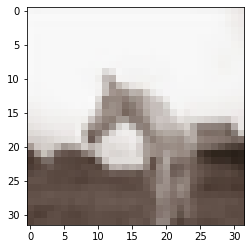

b'ship' , b'horse'


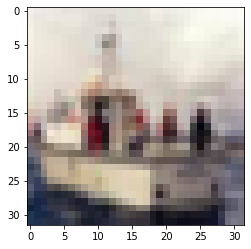

b'ship' , b'ship'


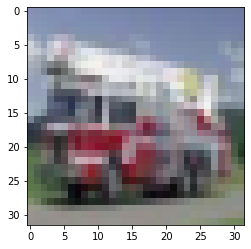

b'truck' , b'truck'


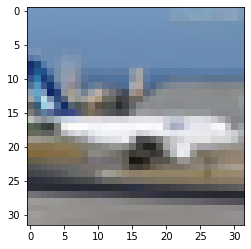

b'airplane' , b'airplane'


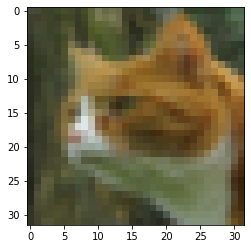

b'frog' , b'cat'


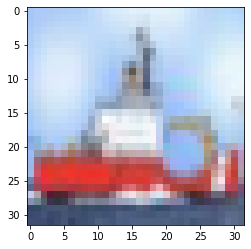

b'ship' , b'ship'


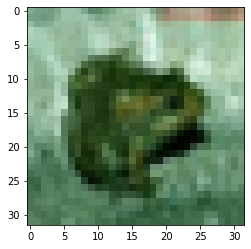

b'frog' , b'frog'


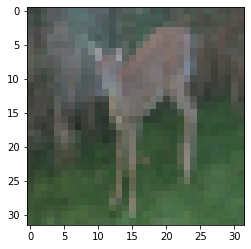

b'deer' , b'deer'


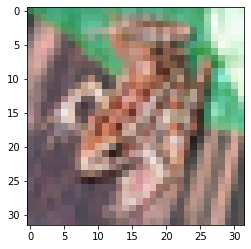

b'frog' , b'frog'


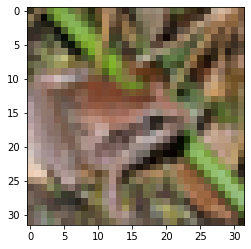

b'deer' , b'frog'


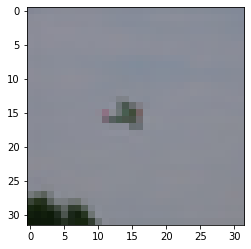

b'ship' , b'airplane'


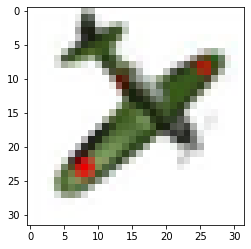

b'bird' , b'airplane'


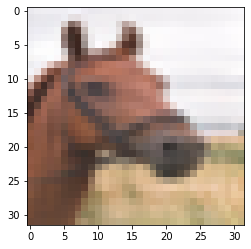

b'horse' , b'horse'


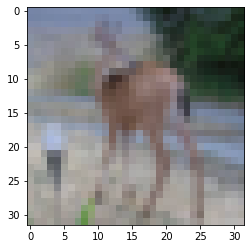

b'deer' , b'deer'


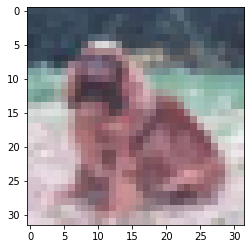

b'dog' , b'dog'


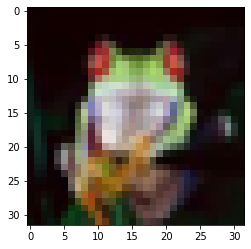

b'frog' , b'frog'


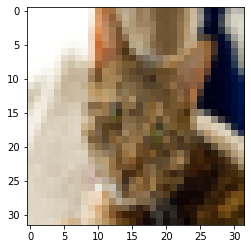

b'cat' , b'cat'


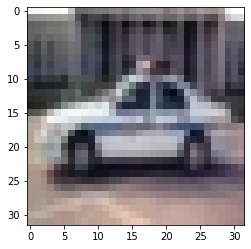

b'automobile' , b'automobile'


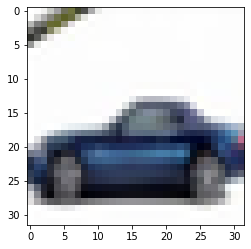

b'automobile' , b'automobile'


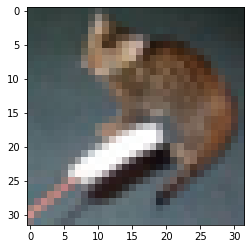

b'cat' , b'cat'


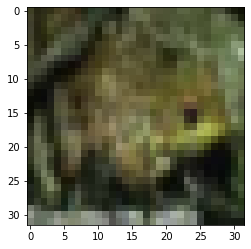

b'frog' , b'frog'


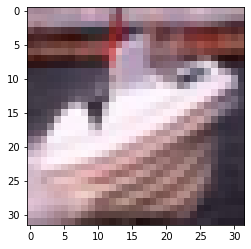

b'ship' , b'ship'


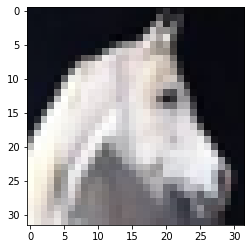

b'horse' , b'horse'


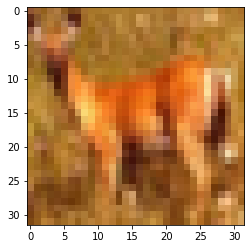

b'bird' , b'deer'


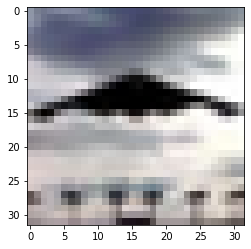

b'airplane' , b'airplane'


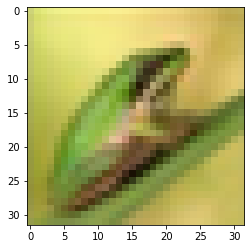

b'bird' , b'frog'


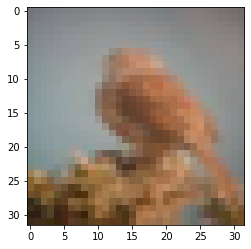

b'bird' , b'bird'


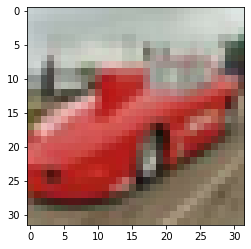

b'automobile' , b'automobile'


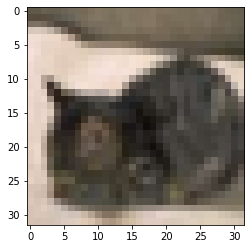

b'horse' , b'cat'


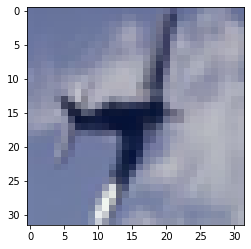

b'airplane' , b'airplane'


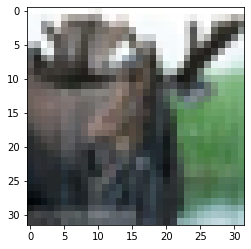

b'deer' , b'deer'


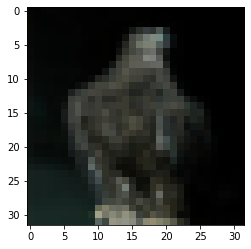

b'frog' , b'bird'


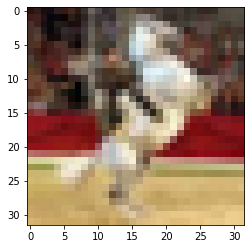

b'horse' , b'horse'


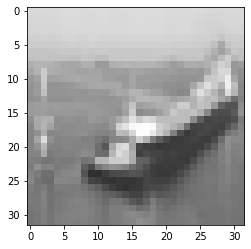

b'ship' , b'ship'


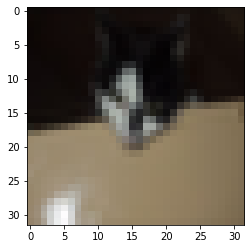

b'cat' , b'cat'


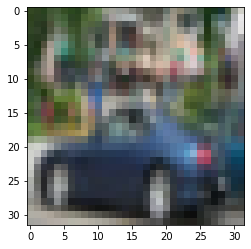

b'automobile' , b'automobile'


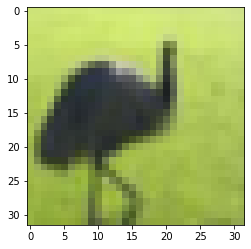

b'bird' , b'bird'


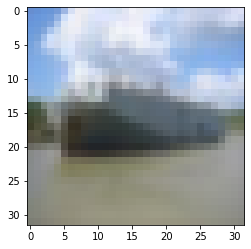

b'ship' , b'ship'


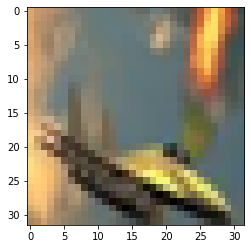

b'bird' , b'airplane'


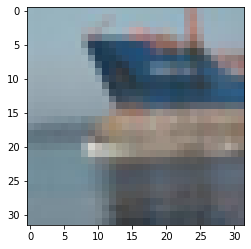

b'ship' , b'ship'


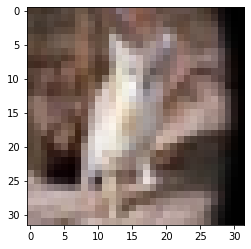

b'cat' , b'cat'


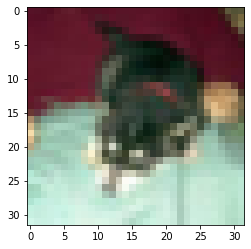

b'frog' , b'dog'


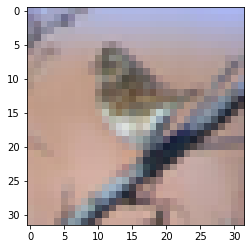

b'bird' , b'bird'


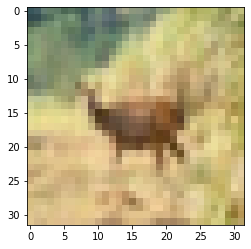

b'deer' , b'deer'


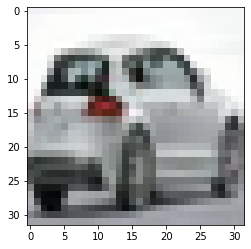

b'automobile' , b'automobile'


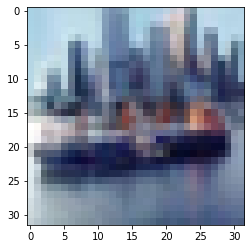

b'truck' , b'ship'


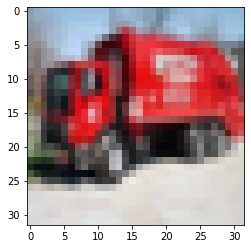

b'truck' , b'truck'


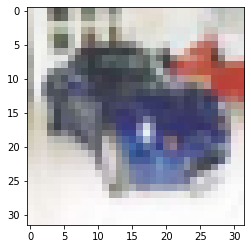

b'automobile' , b'automobile'


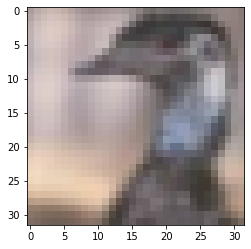

b'bird' , b'bird'


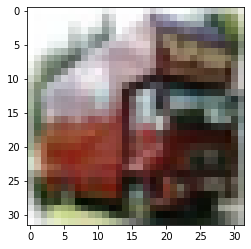

b'truck' , b'truck'


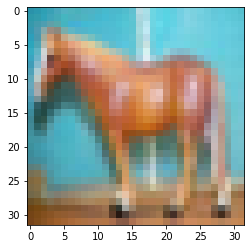

b'horse' , b'horse'


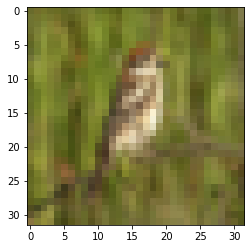

b'bird' , b'bird'


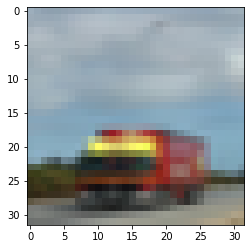

b'ship' , b'truck'


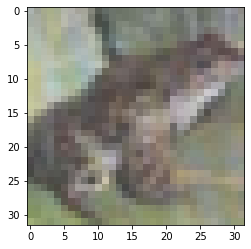

b'deer' , b'frog'


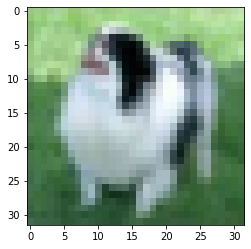

b'dog' , b'dog'


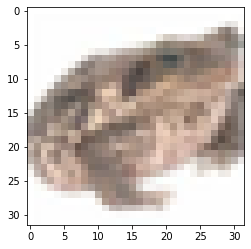

b'frog' , b'frog'


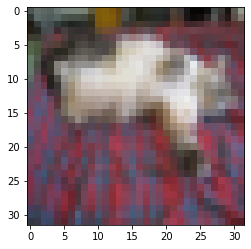

b'dog' , b'cat'


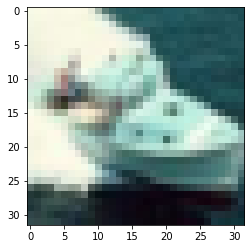

b'ship' , b'ship'


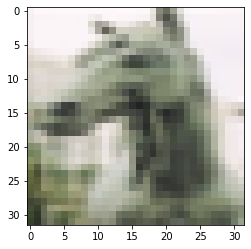

b'horse' , b'horse'


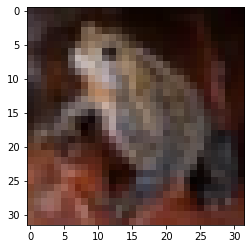

b'cat' , b'frog'


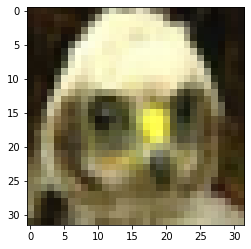

b'dog' , b'bird'


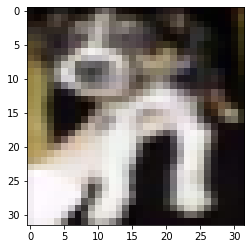

b'dog' , b'dog'


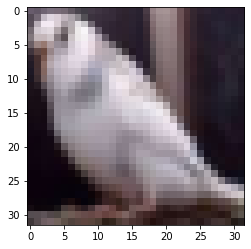

b'cat' , b'bird'


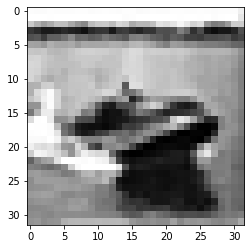

b'ship' , b'ship'


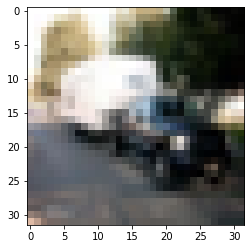

b'automobile' , b'truck'


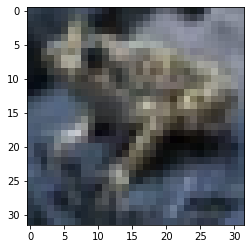

b'frog' , b'frog'


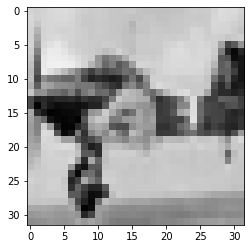

b'airplane' , b'airplane'


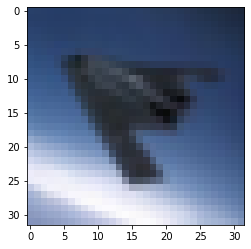

b'airplane' , b'airplane'


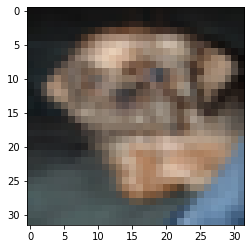

b'dog' , b'dog'


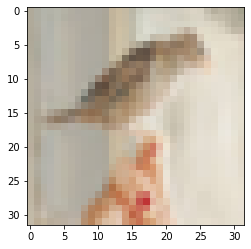

b'bird' , b'bird'


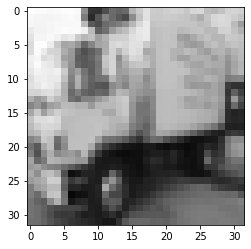

b'truck' , b'truck'


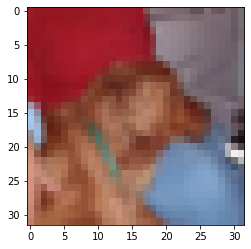

b'cat' , b'dog'


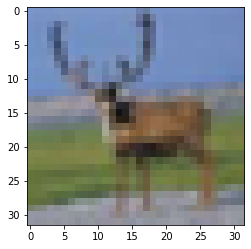

b'deer' , b'deer'


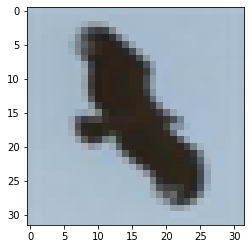

b'airplane' , b'bird'


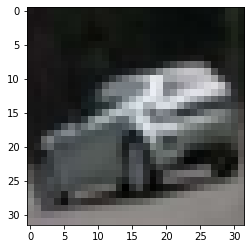

b'automobile' , b'automobile'


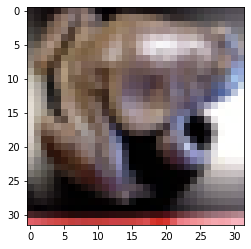

b'frog' , b'frog'


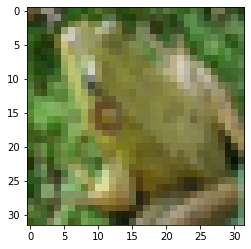

b'frog' , b'frog'


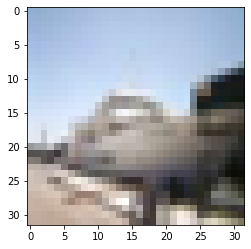

b'airplane' , b'ship'


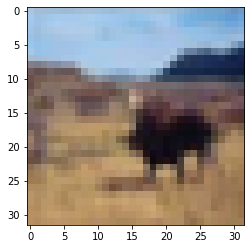

b'deer' , b'deer'


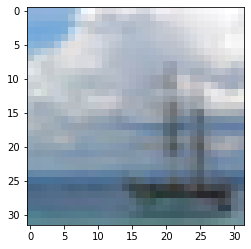

b'ship' , b'ship'


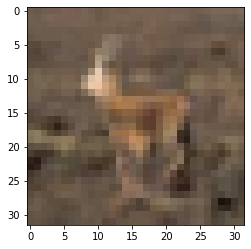

b'deer' , b'deer'


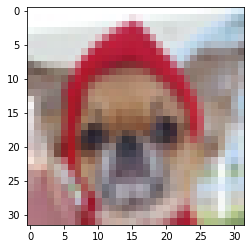

b'dog' , b'dog'


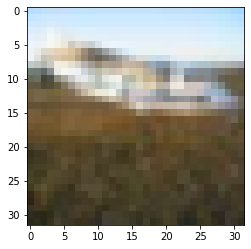

b'deer' , b'airplane'


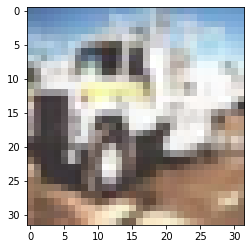

b'truck' , b'truck'


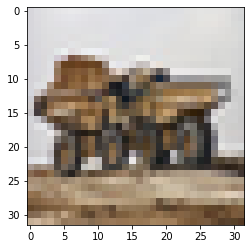

b'truck' , b'truck'


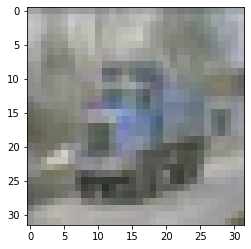

b'truck' , b'truck'


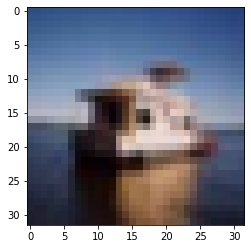

b'ship' , b'ship'


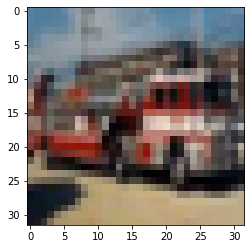

b'truck' , b'truck'


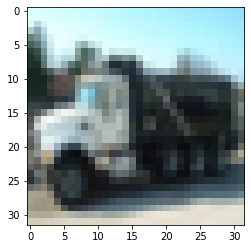

b'truck' , b'truck'


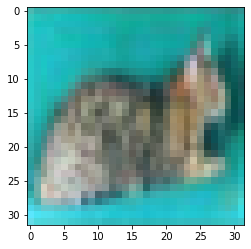

b'deer' , b'cat'


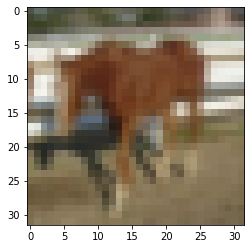

b'horse' , b'horse'


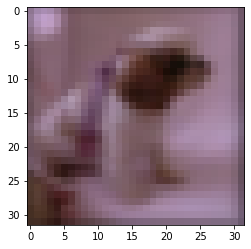

b'dog' , b'dog'


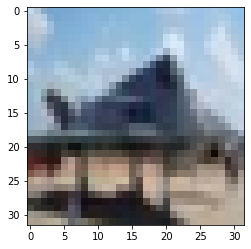

b'airplane' , b'airplane'


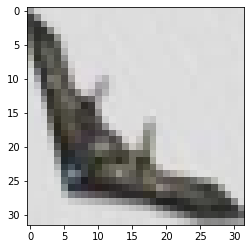

b'airplane' , b'airplane'


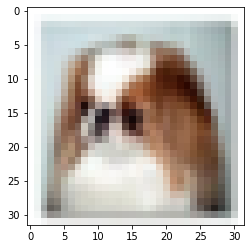

b'dog' , b'dog'


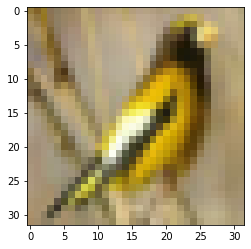

b'bird' , b'bird'


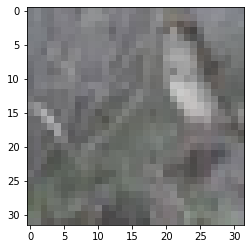

b'bird' , b'bird'


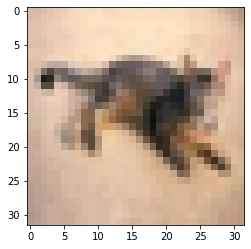

b'dog' , b'cat'


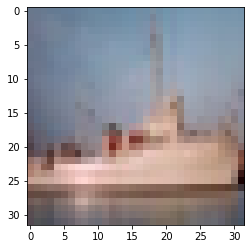

b'deer' , b'ship'


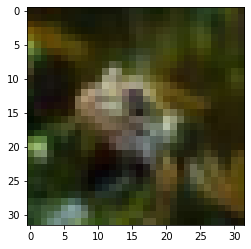

b'frog' , b'frog'


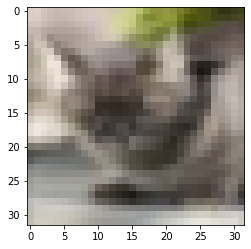

b'cat' , b'cat'


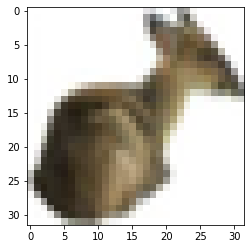

b'horse' , b'deer'


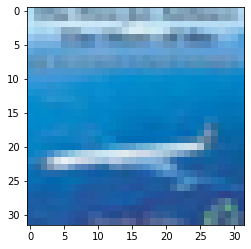

b'ship' , b'airplane'


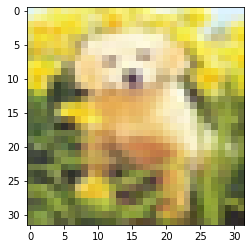

b'dog' , b'dog'


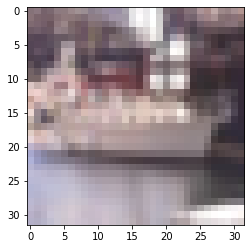

b'ship' , b'ship'


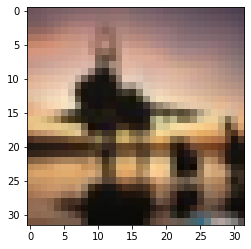

b'horse' , b'airplane'


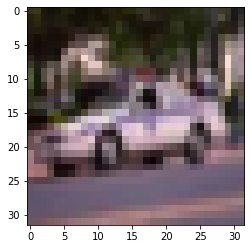

b'automobile' , b'automobile'


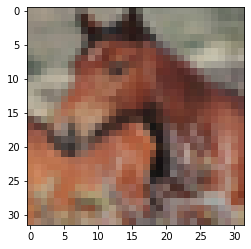

b'horse' , b'horse'


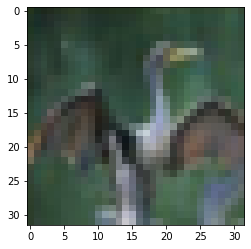

b'deer' , b'bird'


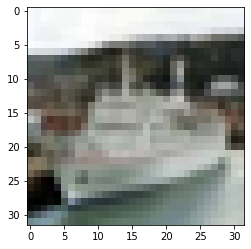

b'ship' , b'ship'


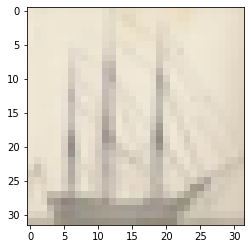

b'ship' , b'ship'


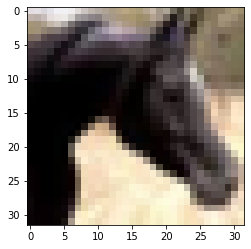

b'horse' , b'horse'


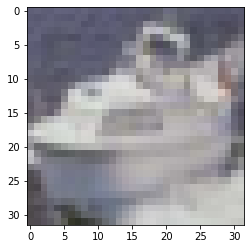

b'ship' , b'ship'


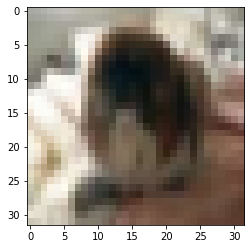

b'cat' , b'dog'


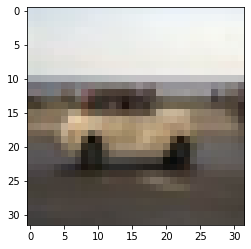

b'airplane' , b'automobile'


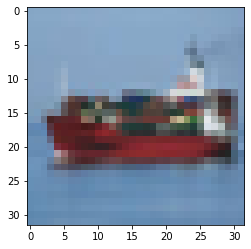

b'ship' , b'ship'


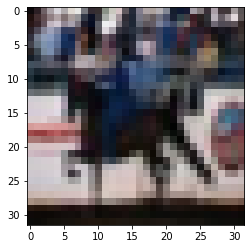

b'horse' , b'horse'


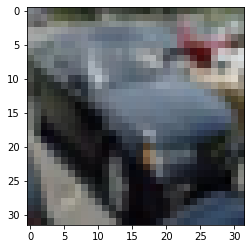

b'automobile' , b'automobile'


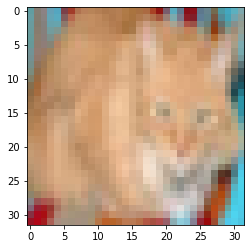

b'cat' , b'cat'


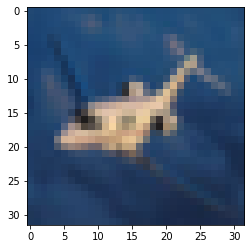

b'airplane' , b'airplane'


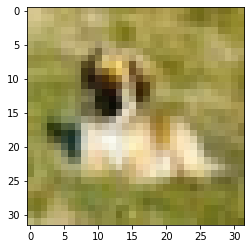

b'dog' , b'dog'


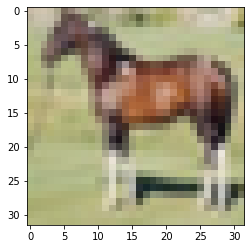

b'horse' , b'horse'


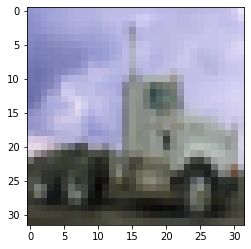

b'truck' , b'truck'


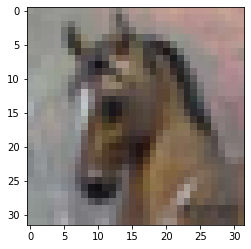

b'dog' , b'horse'


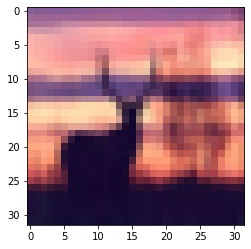

b'airplane' , b'deer'


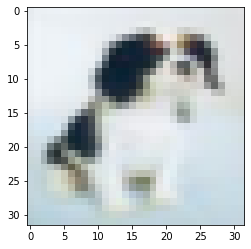

b'dog' , b'dog'


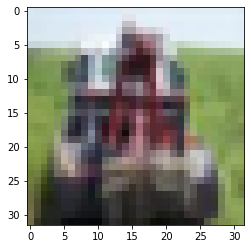

b'truck' , b'truck'


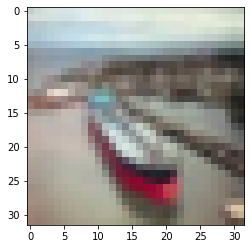

b'ship' , b'ship'


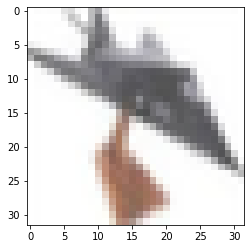

b'airplane' , b'airplane'


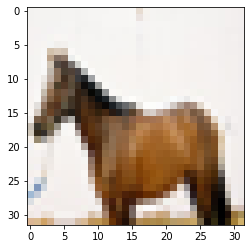

b'horse' , b'horse'


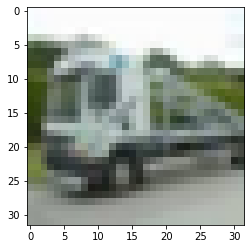

b'truck' , b'truck'


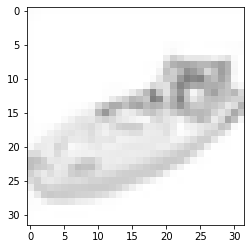

b'ship' , b'ship'


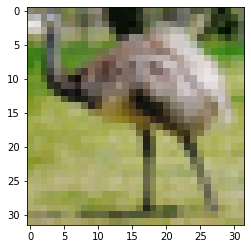

b'horse' , b'bird'


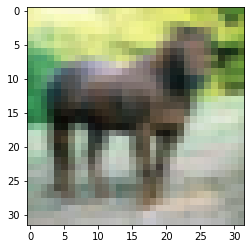

b'horse' , b'horse'


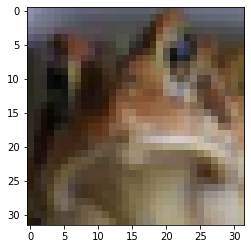

b'cat' , b'frog'


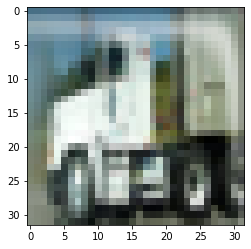

b'truck' , b'truck'


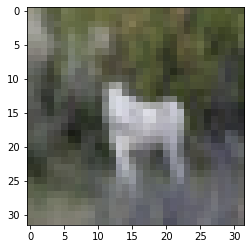

b'dog' , b'deer'


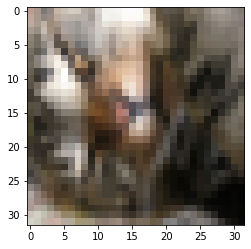

b'cat' , b'cat'


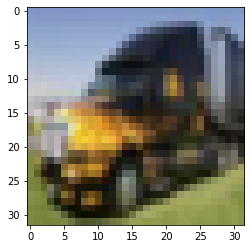

b'truck' , b'truck'


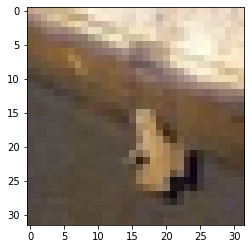

b'cat' , b'frog'


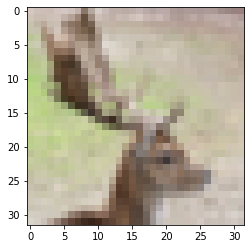

b'bird' , b'deer'


KeyboardInterrupt: 

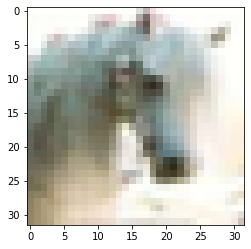

In [26]:
test_visual(model,test_dataset,meta)